In [ ]:
import pandas as pd

# Remplacez 'chemin/vers/fichier.csv' par le chemin de votre fichier
df = pd.read_csv('C:/Users/kaddo/Downloads/data/predictive.csv')

# Affichez les premières lignes pour vérifier le chargement
print(df.head())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  


In [ ]:
# Suppression des colonnes 'UDi' et 'product id'
df = df.drop(['UDI', 'Product ID'], axis=1)

# Affichage du DataFrame pour vérifier que les colonnes sont supprimées
print(df.head())


  Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type  
0         42.8                0       0   No Failure  
1         46.3                3       0   No Failure  
2         49.4                5       0   No Failure  
3         39.5                7       0   No Failure  
4         40.0                9       0   No Failure  


In [ ]:
# Utiliser LabelEncoder pour convertir les valeurs textuelles en valeurs numériques
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])

print(df)

     Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3          

In [ ]:
# Utiliser LabelEncoder pour convertir les valeurs textuelles en valeurs numériques
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])

print(df)

      Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   

In [ ]:
print(df.dtypes)

Type                         int32
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                 int32
dtype: object


In [ ]:

# Afficher le nombre de valeurs manquantes
print(df.isnull().sum())

 #Supprimer les lignes avec des valeurs manquantes
df = df.dropna()

# Si des valeurs aberrantes nécessitent d'être traitées, vous pouvez également appliquer des filtres
# Exemple : éliminer les valeurs aberrantes pour 'Torque [Nm]'
df = df[(df['Torque [Nm]'] > 0) & (df['Torque [Nm]'] < 500)]  # Ajustez les seuils selon votre contexte


Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [ ]:
# Colonnes numériques continues à standardiser
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

cols_to_standardize = ['Air temperature [K]', 'Process temperature [K]',
                       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

scaler = StandardScaler()
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


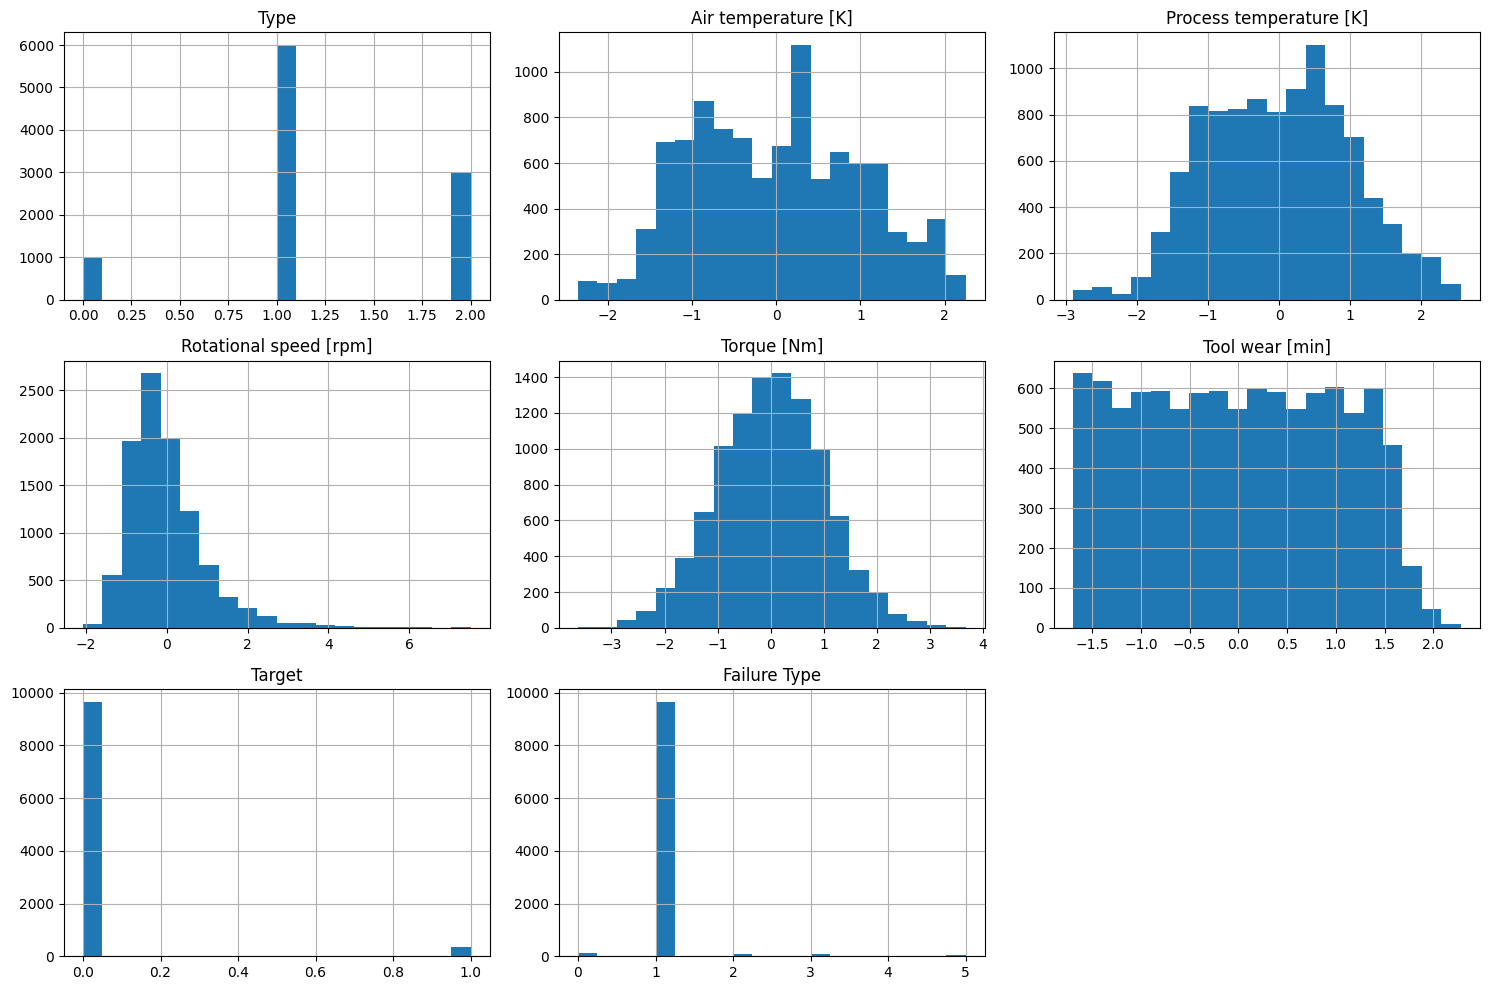

In [ ]:
# Histogrammes des variables numériques
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


ValueError: num must be an integer with 1 <= num <= 6, not 7

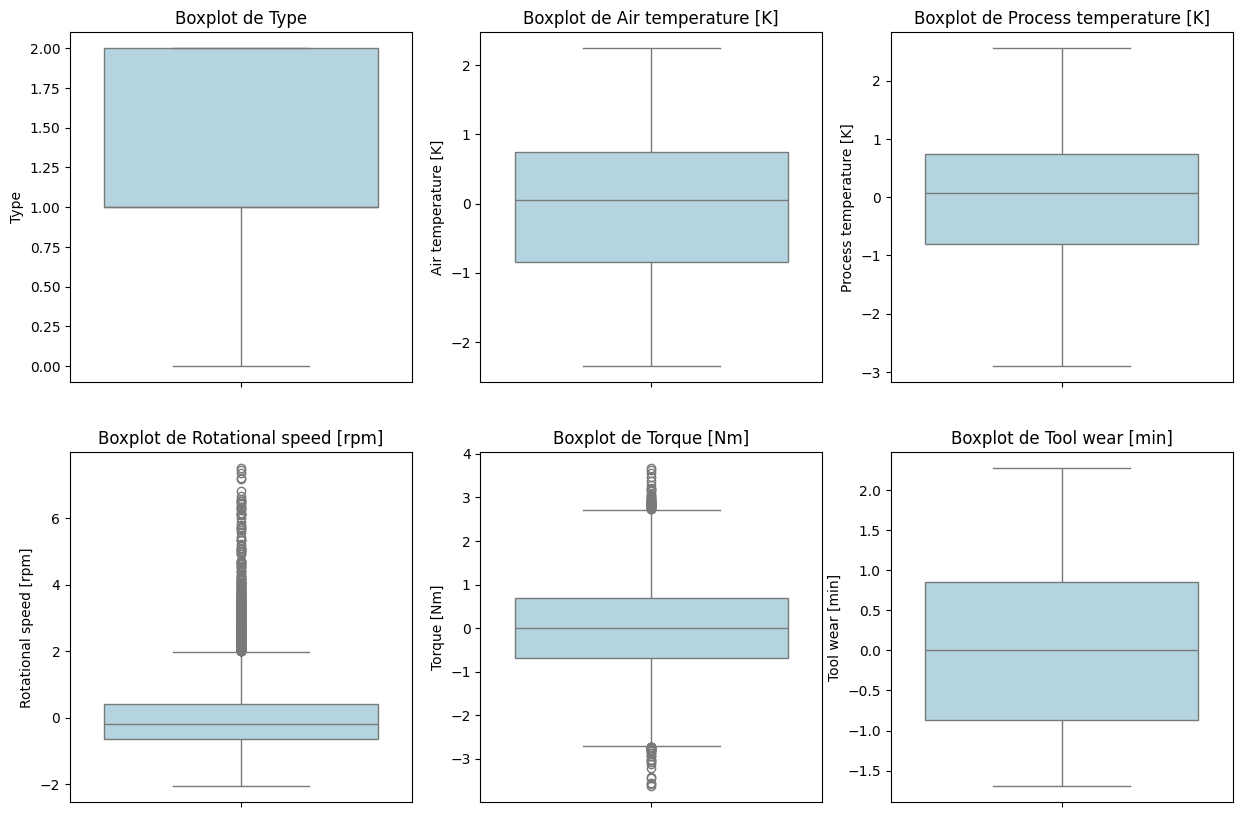

In [ ]:
# Boxplots pour chaque variable numérique
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[col], color='lightblue')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd



# Fonction pour détecter et supprimer les valeurs aberrantes basées sur l'IQR
def remove_outliers(df):
    # Itérer à travers chaque colonne numérique pour détecter les valeurs aberrantes
    for col in df.select_dtypes(include=[np.number]).columns:
        # Calculer les quartiles Q1 et Q3
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Définir les limites inférieure et supérieure
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Filtrer les données et garder uniquement les valeurs entre les limites
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

    return df

# Appliquer la fonction pour supprimer les valeurs aberrantes
df = remove_outliers(df)

# Afficher les premières lignes du dataframe nettoyé
print(df.head())


   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2            -0.952389                -0.947360                0.068185   
1     1            -0.902393                -0.879959               -0.729472   
2     1            -0.952389                -1.014761               -0.227450   
3     1            -0.902393                -0.947360               -0.590021   
4     1            -0.902393                -0.879959               -0.729472   

   Torque [Nm]  Tool wear [min]  Target  Failure Type  
0     0.282200        -1.695984       0             1  
1     0.633308        -1.648852       0             1  
2     0.944290        -1.617430       0             1  
3    -0.048845        -1.586009       0             1  
4     0.001313        -1.554588       0             1  


ValueError: num must be an integer with 1 <= num <= 6, not 7

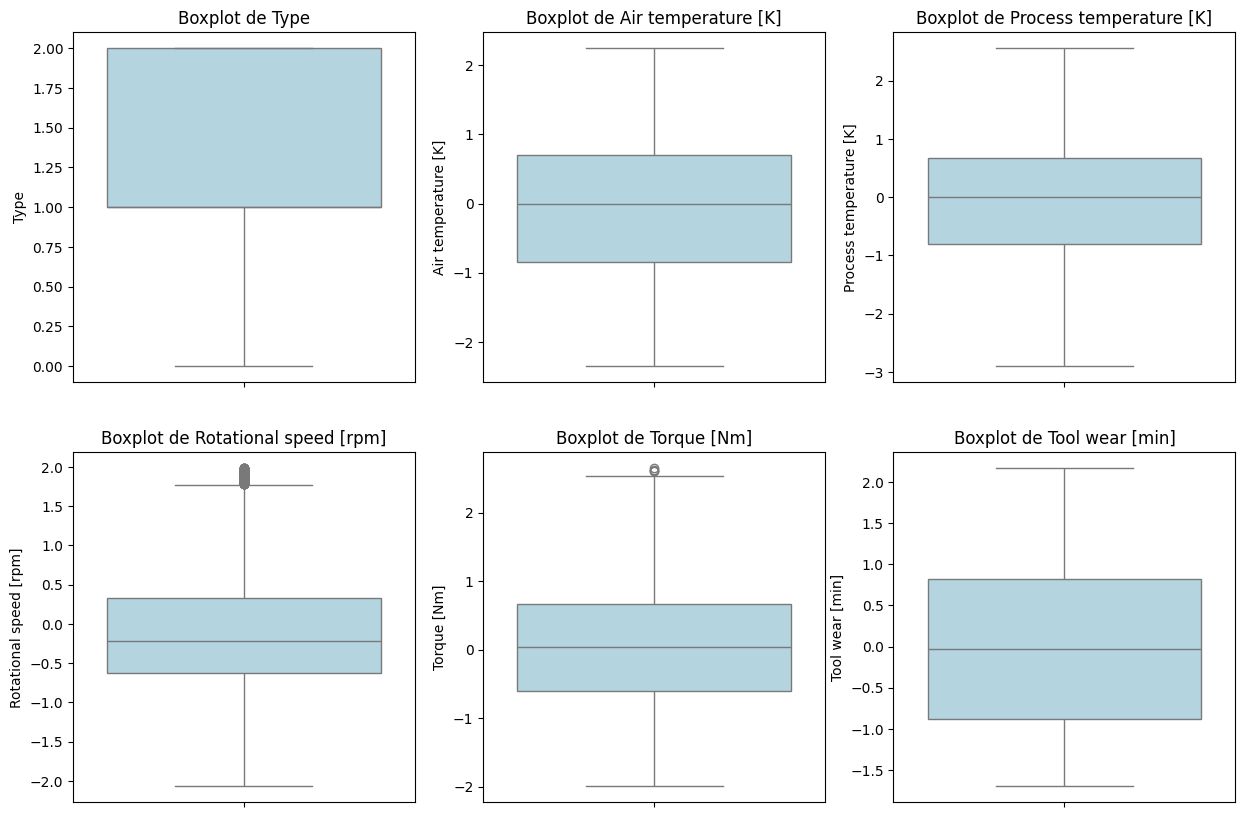

In [ ]:
# Boxplots pour chaque variable numérique
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[col], color='lightblue')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


In [ ]:
# Calcul de la matrice de corrélation
correlation_matrix = df.corr()

# Visualisation de la matrice de corrélation avec un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()


ValueError: num must be an integer with 1 <= num <= 6, not 8

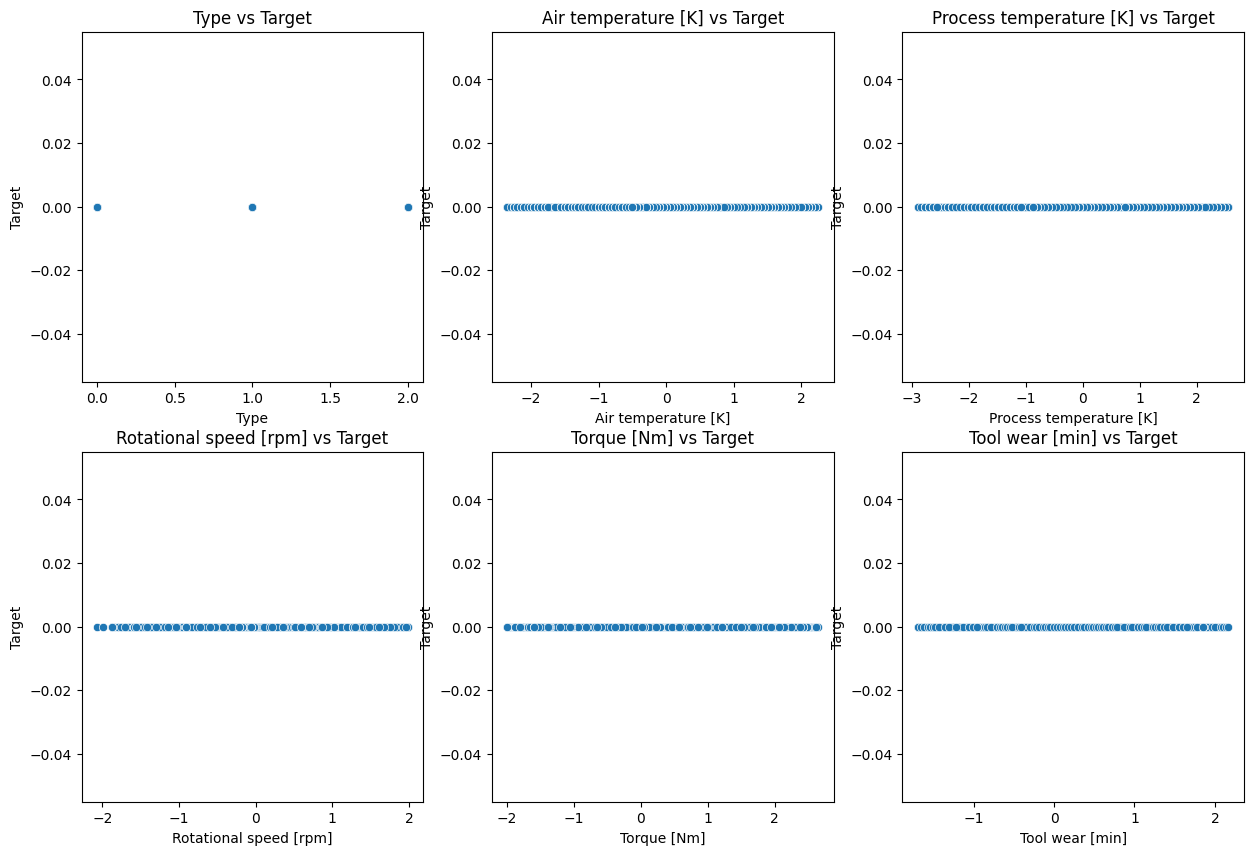

In [ ]:
# Scatterplots pour analyser la relation avec 'Target'
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    if col != 'Target':
        plt.subplot(2, 3, i)
        sns.scatterplot(x=df[col], y=df['Target'])
        plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()


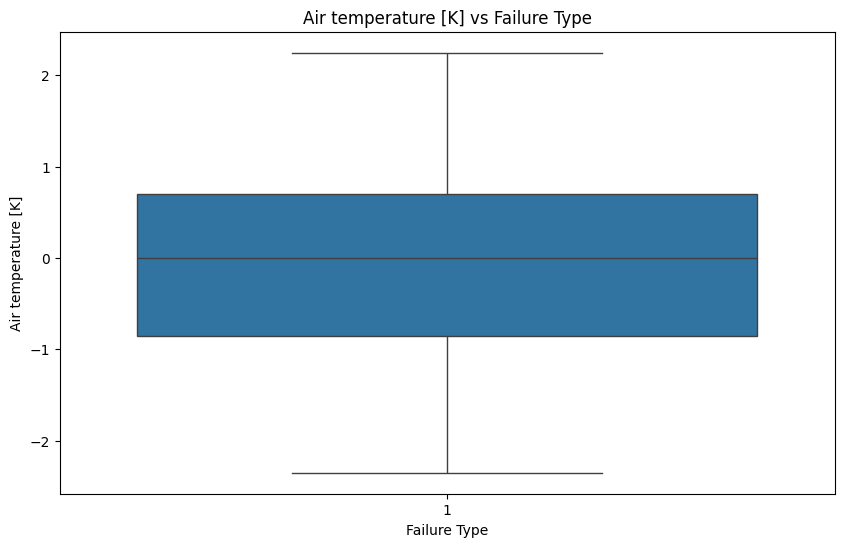

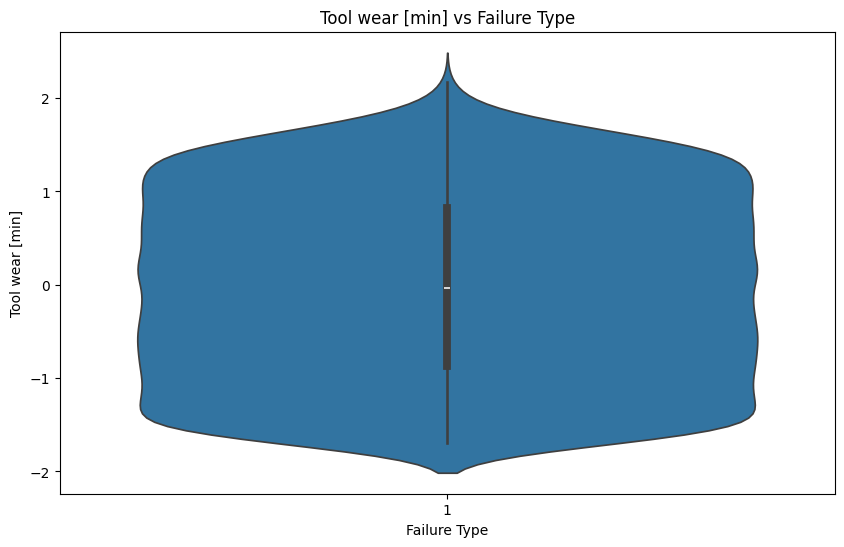

In [ ]:
# Boxplot pour visualiser la distribution de 'Air temperature [K]' selon 'Failure Type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Failure Type', y='Air temperature [K]', data=df)
plt.title('Air temperature [K] vs Failure Type')
plt.show()

# Violon plot pour la variable 'Tool wear [min]' selon 'Failure Type'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Failure Type', y='Tool wear [min]', data=df)
plt.title('Tool wear [min] vs Failure Type')
plt.show()


In [ ]:
df = df.dropna()  # ou une autre méthode pour imputer les valeurs manquantes


In [ ]:
y = pd.factorize(df['Target'])[0]  # Convertir les catégories en entiers


In [ ]:
X = pd.get_dummies(X)  # Utiliser l'encodage One-Hot pour les variables catégorielles


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd


# Séparer les caractéristiques et la variable cible
X = df.drop(columns=['Target'])  # Supposer que 'Target' est la variable cible
y = df['Target']

# Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Créer un dataframe avec les données augmentées
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Target'] = y_resampled

# Afficher les premières lignes du dataframe équilibré
print(df_resampled.head())

# Vérifier l'équilibre des classes avant et après
print("Distribution avant SMOTE :")
print(y.value_counts())
print("Distribution après SMOTE :")
print(y_resampled.value_counts())


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [ ]:
print(df.dtypes)

Type                         int32
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]     float64
Torque [Nm]                float64
Tool wear [min]            float64
Target                       int64
Failure Type                 int32
dtype: object


In [ ]:
# Séparation des caractéristiques et de la cible
X = df.drop(columns=['Target']).values  # Toutes les colonnes sauf 'target'
y = df['Target'].values  # La colonne cible

# Normalisation des caractéristiques
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalisation des données

# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
import torch

# Convertir les données en tensors PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Convertir les étiquettes en tensors PyTorch (pour classification multi-classes, utiliser dtype long)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


In [ ]:
import torch.nn as nn

class DeepNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DeepNN, self).__init__()

        # Définir les couches
        self.fc1 = nn.Linear(input_size, 128)  # Première couche cachée
        self.fc2 = nn.Linear(128, 64)  # Deuxième couche cachée
        self.fc3 = nn.Linear(64, num_classes)  # Couche de sortie (une sortie par classe)

        # Fonction d'activation
        self.relu = nn.ReLU()

    def forward(self, x):
        # Passer les données à travers les couches
        x = self.relu(self.fc1(x))  # Première couche cachée
        x = self.relu(self.fc2(x))  # Deuxième couche cachée
        x = self.fc3(x)  # Couche de sortie (sans activation, CrossEntropyLoss gère softmax)
        return x


In [ ]:
# Nombre d'entrées (features) et nombre de classes
input_size = X_train.shape[1]  # Nombre de caractéristiques
num_classes = len(np.unique(y))  # Nombre de classes cibles (unique dans y)

# Initialiser le modèle
model = DeepNN(input_size=input_size, num_classes=num_classes)

# Définir la fonction de perte
criterion = nn.CrossEntropyLoss()

# Définir l'optimiseur
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Entraînement du modèle
num_epochs = 50  # Nombre d'époques

for epoch in range(num_epochs):
    model.train()  # Mettre le modèle en mode entraînement
    optimizer.zero_grad()  # Réinitialiser les gradients

    # Passer les données d'entraînement à travers le modèle
    outputs = model(X_train_tensor)

    # Calculer la perte
    loss = criterion(outputs, y_train_tensor)

    # Faire rétropropagation
    loss.backward()

    # Mettre à jour les poids
    optimizer.step()

    # Afficher la perte toutes les 10 époques
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [10/50], Loss: 0.0000
Epoch [20/50], Loss: 0.0000
Epoch [30/50], Loss: 0.0000
Epoch [40/50], Loss: 0.0000
Epoch [50/50], Loss: 0.0000


In [ ]:
# Évaluation du modèle
model.eval()  # Mettre le modèle en mode évaluation
with torch.no_grad():  # Pas de calcul des gradients
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)  # Prendre la classe avec la probabilité la plus élevée
    correct = (predicted == y_test_tensor).sum().item()  # Comparer les prédictions avec les vraies étiquettes
    accuracy = correct / y_test_tensor.size(0)
    print(f'Accuracy on the test dataset: {accuracy * 100:.2f}%')


Accuracy on the test dataset: 100.00%


In [ ]:
from sklearn.model_selection import RandomizedSearchCV  # Utiliser RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Charger le jeu de données (exemple avec Iris)
data = load_iris()
X = data.data
y = data.target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Définir le modèle
model = MLPClassifier(max_iter=1000, random_state=42)

# Définir la grille des hyperparamètres
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],  # Architecture plus simple
    'activation': ['relu', 'tanh'],         # Activer seulement deux options populaires
    'solver': ['adam', 'sgd'],              # Optimiseurs courants
    'alpha': [0.0001, 0.001],               # Paramètre de régularisation
    'learning_rate': ['constant', 'adaptive'],  # Réduire les choix d'apprentissage
    'learning_rate_init': [0.001, 0.01]         # Taux d'apprentissage initial
}

# Configurer RandomizedSearchCV pour une recherche aléatoire
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Exécuter la recherche
random_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et la meilleure performance de validation croisée
print("Meilleurs paramètres trouvés : ", random_search.best_params_)
print("Meilleure précision de validation croisée : {:.2f}".format(random_search.best_score_))

# Évaluer le modèle sur les données de test
best_model = random_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Précision sur les données de test : {:.2f}".format(test_score))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Meilleurs paramètres trouvés :  {'solver': 'adam', 'learning_rate_init': 0.001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50,), 'alpha': 0.001, 'activation': 'tanh'}
Meilleure précision de validation croisée : 0.96
Précision sur les données de test : 0.97


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

class PyTorchModelWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, input_size, num_classes, learning_rate=0.001, optimizer_type='Adam', num_epochs=50):
        self.input_size = input_size
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.optimizer_type = optimizer_type
        self.num_epochs = num_epochs
        self.model = None

    def fit(self, X, y):
        # Convertir X et y en tensors PyTorch
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.long)

        # Initialiser le modèle
        self.model = DeepNN(self.input_size, self.num_classes)

        # Choisir l'optimiseur
        if self.optimizer_type == 'Adam':
            optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        elif self.optimizer_type == 'SGD':
            optimizer = optim.SGD(self.model.parameters(), lr=self.learning_rate)

        criterion = nn.CrossEntropyLoss()

        # Entraînement du modèle
        for epoch in range(self.num_epochs):
            self.model.train()  # Mode entraînement
            optimizer.zero_grad()
            outputs = self.model(X_tensor)
            loss = criterion(outputs, y_tensor)
            loss.backward()
            optimizer.step()

        return self

    def predict(self, X):
        self.model.eval()  # Mode évaluation
        X_tensor = torch.tensor(X, dtype=torch.float32)
        with torch.no_grad():
            outputs = self.model(X_tensor)
            _, predicted = torch.max(outputs, 1)
        return predicted.numpy()

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Paramètres à tester
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'optimizer_type': ['Adam', 'SGD'],
    'num_epochs': [50, 100],
}

# Initialiser le wrapper du modèle
input_size = X_train.shape[1]  # Nombre de caractéristiques
num_classes = len(np.unique(y))  # Nombre de classes cibles (unique dans y)
model_wrapper = PyTorchModelWrapper(input_size=input_size, num_classes=num_classes)

# GridSearch avec validation croisée
grid_search = GridSearchCV(estimator=model_wrapper, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=1)

# Lancer la recherche sur grille
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres et la meilleure performance
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\kaddo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kaddo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kaddo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kaddo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
 

Best Hyperparameters: {'learning_rate': 0.001, 'num_epochs': 50, 'optimizer_type': 'Adam'}
Best Accuracy: nan


In [ ]:
best_model = grid_search.best_estimator_

# Entraînement final avec les meilleurs paramètres
best_model.fit(X_train, y_train)

# Évaluation sur l'ensemble de test
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy with best hyperparameters: {test_accuracy * 100:.2f}%")


Test Accuracy with best hyperparameters: 100.00%


C:\Users\kaddo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kaddo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kaddo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kaddo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

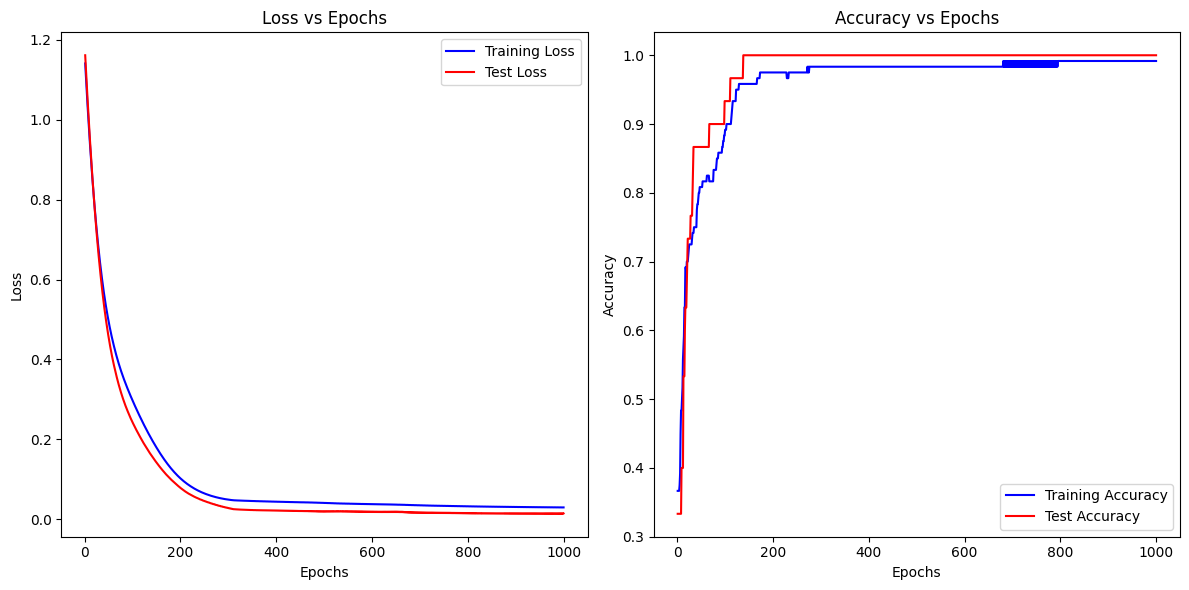

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# Load dataset (example using Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = MLPClassifier(max_iter=1, warm_start=True, random_state=42)

# Initialize lists to store loss and accuracy values
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

# Train the model manually to capture training history
for epoch in range(1, 1001):  # Train for 1000 epochs
    model.fit(X_train, y_train)

    # Capture training loss and accuracy
    train_loss.append(log_loss(y_train, model.predict_proba(X_train)))
    train_accuracy.append(model.score(X_train, y_train))

    # Evaluate on test data
    test_loss.append(log_loss(y_test, model.predict_proba(X_test)))
    test_accuracy.append(model.score(X_test, y_test))

# Plot Loss vs Epochs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 1001), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, 1001), test_loss, label='Test Loss', color='red')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy vs Epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, 1001), train_accuracy, label='Training Accuracy', color='blue')
plt.plot(range(1, 1001), test_accuracy, label='Test Accuracy', color='red')
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\kaddo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kaddo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kaddo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kaddo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.98      0.99        41
           2       0.97      1.00      0.99        39

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Training Accuracy: 0.9917
Training Sensitivity: 0.9917
Training Precision: 0.9919
Training F1 Score: 0.9917
Test Accuracy: 1.0000
Test Sensitivity: 1.0000
Test 

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

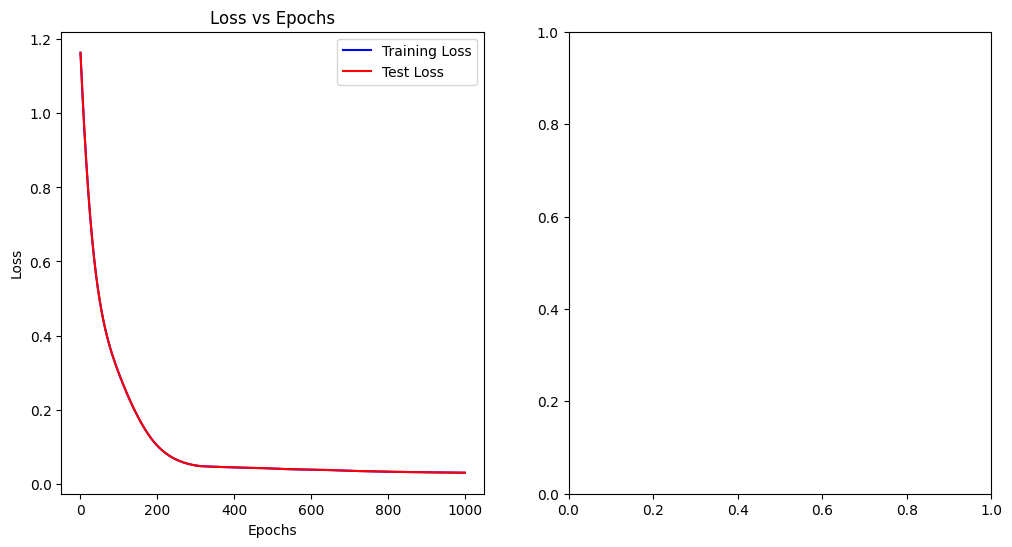

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

# Load dataset (example using Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = MLPClassifier(max_iter=1, warm_start=True, random_state=42)

# Initialize lists to store loss and accuracy values
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

# Train the model manually to capture training history
for epoch in range(1, 1001):  # Train for 1000 epochs
    model.fit(X_train, y_train)

    # Capture training loss and accuracy
    train_loss.append(model.loss_)
    train_accuracy.append(accuracy_score(y_train, model.predict(X_train)))

    # Evaluate on test data
    test_loss.append(model.loss_)
    test_accuracy.append(accuracy_score(y_test, model.predict(X_test)))

# Print classification report for both train and test datasets
print("Classification Report for Training Data:")
train_preds = model.predict(X_train)
print(classification_report(y_train, train_preds))

print("Classification Report for Test Data:")
test_preds = model.predict(X_test)
print(classification_report(y_test, test_preds))

# Calculate and print accuracy, sensitivity, precision, and F1 score for both train and test
train_accuracy = accuracy_score(y_train, train_preds)
train_sensitivity = recall_score(y_train, train_preds, average='weighted')  # Sensitivity (Recall)
train_precision = precision_score(y_train, train_preds, average='weighted')  # Precision
train_f1 = f1_score(y_train, train_preds, average='weighted')  # F1 Score

test_accuracy = accuracy_score(y_test, test_preds)
test_sensitivity = recall_score(y_test, test_preds, average='weighted')
test_precision = precision_score(y_test, test_preds, average='weighted')
test_f1 = f1_score(y_test, test_preds, average='weighted')

# Output metrics
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Sensitivity: {train_sensitivity:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Sensitivity: {test_sensitivity:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

# Optionally, print confusion matrix for both train and test datasets
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_train, train_preds))

print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, test_preds))

# Plot Loss vs Epochs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 1001), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, 1001), test_loss, label='Test Loss', color='red')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy vs Epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, 1001), train_accuracy, label='Training Accuracy', color='blue')
plt.plot(range(1, 1001), test_accuracy, label='Test Accuracy', color='red')
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\kaddo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kaddo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kaddo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kaddo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.98      0.99        41
           2       0.97      1.00      0.99        39

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Training Accuracy: 0.9917
Training Sensitivity: 0.9917
Training Precision: 0.9919
Training F1 Score: 0.9917
Test Accuracy: 1.0000
Test Sensitivity: 1.0000
Test 

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

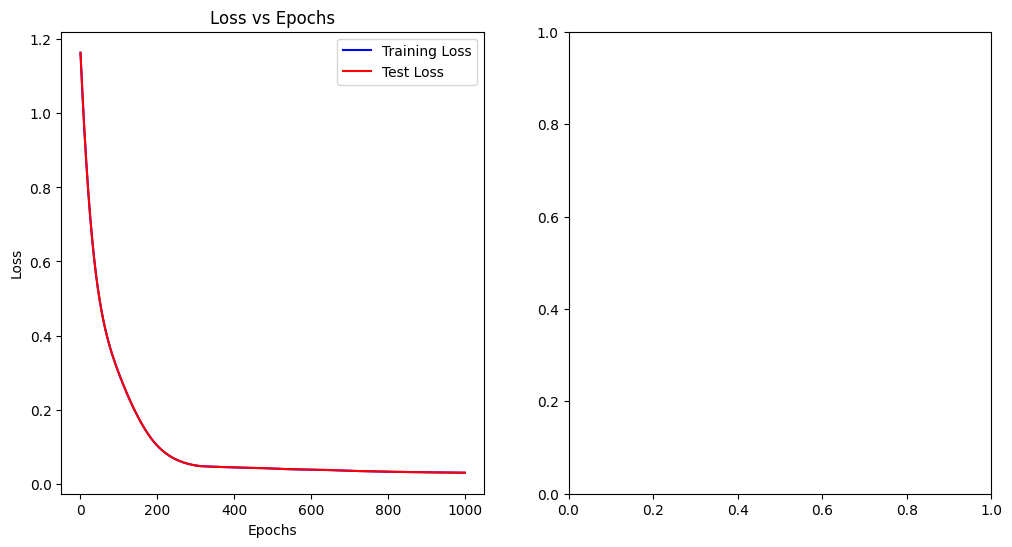

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

# Load dataset (example using Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = MLPClassifier(max_iter=1, warm_start=True, random_state=42)

# Initialize lists to store loss and accuracy values
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

# Train the model manually to capture training history
for epoch in range(1, 1001):  # Train for 1000 epochs
    model.fit(X_train, y_train)

    # Capture training loss and accuracy
    train_loss.append(model.loss_)
    train_accuracy.append(accuracy_score(y_train, model.predict(X_train)))

    # Evaluate on test data
    test_loss.append(model.loss_)
    test_accuracy.append(accuracy_score(y_test, model.predict(X_test)))

# Print classification report for both train and test datasets
print("Classification Report for Training Data:")
train_preds = model.predict(X_train)
print(classification_report(y_train, train_preds))

print("Classification Report for Test Data:")
test_preds = model.predict(X_test)
print(classification_report(y_test, test_preds))

# Calculate and print accuracy, sensitivity, precision, and F1 score for both train and test
train_accuracy = accuracy_score(y_train, train_preds)
train_sensitivity = recall_score(y_train, train_preds, average='weighted')  # Sensitivity (Recall)
train_precision = precision_score(y_train, train_preds, average='weighted')  # Precision
train_f1 = f1_score(y_train, train_preds, average='weighted')  # F1 Score

test_accuracy = accuracy_score(y_test, test_preds)
test_sensitivity = recall_score(y_test, test_preds, average='weighted')
test_precision = precision_score(y_test, test_preds, average='weighted')
test_f1 = f1_score(y_test, test_preds, average='weighted')

# Output metrics
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Sensitivity: {train_sensitivity:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Sensitivity: {test_sensitivity:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

# Optionally, print confusion matrix for both train and test datasets
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_train, train_preds))

print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, test_preds))

# Plot Loss vs Epochs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 1001), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, 1001), test_loss, label='Test Loss', color='red')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy vs Epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, 1001), train_accuracy, label='Training Accuracy', color='blue')
plt.plot(range(1, 1001), test_accuracy, label='Test Accuracy', color='red')
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


Classification Report for Training Data (With Regularization):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.95      0.97        41
           2       0.95      1.00      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

Classification Report for Test Data (With Regularization):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Training Accuracy (With Regularization): 0.9833
Training Sensitivity (With Regularization): 0.9833
Training Precisio

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

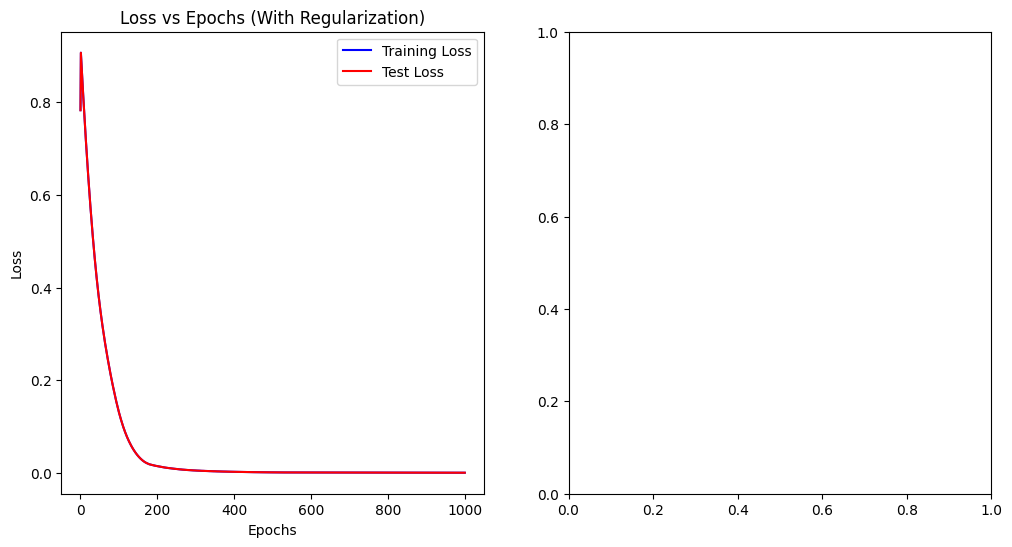

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

# Load dataset (example using Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model with L2 regularization and early stopping
model_with_regularization = MLPClassifier(
    hidden_layer_sizes=(50, 30),  # Example architecture with two hidden layers
    max_iter=1000,
    alpha=0.001,  # L2 regularization term (Ridge)
    random_state=42,
    early_stopping=True,  # Stop early if validation loss does not improve
    validation_fraction=0.1,  # Fraction of training data to use for early stopping
    n_iter_no_change=10,  # Stop if no improvement for 10 iterations
    warm_start=True
)

# Initialize lists to store loss and accuracy values
train_loss_reg = []
train_accuracy_reg = []
test_loss_reg = []
test_accuracy_reg = []

# Train the model manually to capture training history
for epoch in range(1, 1001):  # Train for 1000 epochs
    model_with_regularization.fit(X_train, y_train)

    # Capture training loss and accuracy
    train_loss_reg.append(model_with_regularization.loss_)
    train_accuracy_reg.append(accuracy_score(y_train, model_with_regularization.predict(X_train)))

    # Evaluate on test data
    test_loss_reg.append(model_with_regularization.loss_)
    test_accuracy_reg.append(accuracy_score(y_test, model_with_regularization.predict(X_test)))

# Print classification report for both train and test datasets
print("Classification Report for Training Data (With Regularization):")
train_preds_reg = model_with_regularization.predict(X_train)
print(classification_report(y_train, train_preds_reg))

print("Classification Report for Test Data (With Regularization):")
test_preds_reg = model_with_regularization.predict(X_test)
print(classification_report(y_test, test_preds_reg))

# Calculate and print accuracy, sensitivity, precision, and F1 score for both train and test
train_accuracy_reg = accuracy_score(y_train, train_preds_reg)
train_sensitivity_reg = recall_score(y_train, train_preds_reg, average='weighted')  # Sensitivity (Recall)
train_precision_reg = precision_score(y_train, train_preds_reg, average='weighted')  # Precision
train_f1_reg = f1_score(y_train, train_preds_reg, average='weighted')  # F1 Score

test_accuracy_reg = accuracy_score(y_test, test_preds_reg)
test_sensitivity_reg = recall_score(y_test, test_preds_reg, average='weighted')
test_precision_reg = precision_score(y_test, test_preds_reg, average='weighted')
test_f1_reg = f1_score(y_test, test_preds_reg, average='weighted')

# Output metrics
print(f"Training Accuracy (With Regularization): {train_accuracy_reg:.4f}")
print(f"Training Sensitivity (With Regularization): {train_sensitivity_reg:.4f}")
print(f"Training Precision (With Regularization): {train_precision_reg:.4f}")
print(f"Training F1 Score (With Regularization): {train_f1_reg:.4f}")

print(f"Test Accuracy (With Regularization): {test_accuracy_reg:.4f}")
print(f"Test Sensitivity (With Regularization): {test_sensitivity_reg:.4f}")
print(f"Test Precision (With Regularization): {test_precision_reg:.4f}")
print(f"Test F1 Score (With Regularization): {test_f1_reg:.4f}")

# Optionally, print confusion matrix for both train and test datasets
print("Confusion Matrix for Training Data (With Regularization):")
print(confusion_matrix(y_train, train_preds_reg))

print("Confusion Matrix for Test Data (With Regularization):")
print(confusion_matrix(y_test, test_preds_reg))

# Plot Loss vs Epochs for Regularized Model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 1001), train_loss_reg, label='Training Loss', color='blue')
plt.plot(range(1, 1001), test_loss_reg, label='Test Loss', color='red')
plt.title("Loss vs Epochs (With Regularization)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy vs Epochs for Regularized Model
plt.subplot(1, 2, 2)
plt.plot(range(1, 1001), train_accuracy_reg, label='Training Accuracy', color='blue')
plt.plot(range(1, 1001), test_accuracy_reg, label='Test Accuracy', color='red')
plt.title("Accuracy vs Epochs (With Regularization)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
